# มาทำ ANOVA กันเถอะ

# Step1: Data Loading and preparing

In [20]:
##Import Required Modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [21]:
##Loading Data (CSV format)
url='https://raw.githubusercontent.com/wutto/aspergillusAculeatus/main/1_input_TPM_profile.csv'
dfAll=pd.read_csv(url)
dfAll.head()
df =  dfAll[dfAll['Lot']=="Lot2"]

<AxesSubplot:xlabel='medium', ylabel='Act_CMCase'>

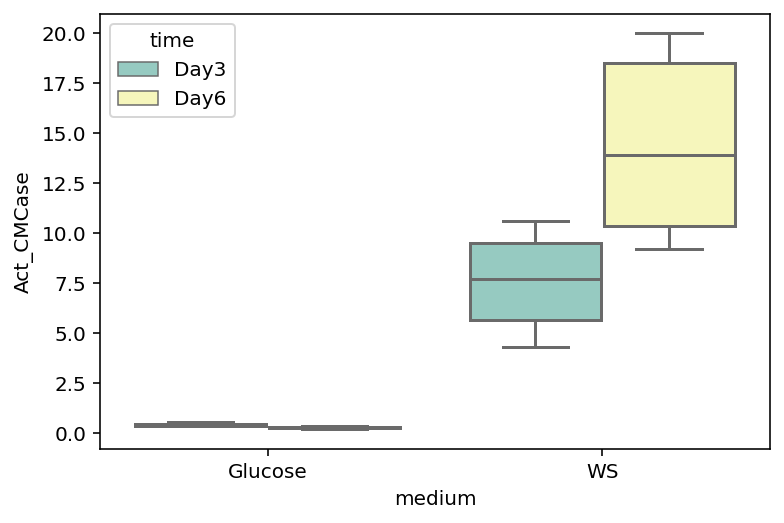

In [22]:
##Source: https://www.reneshbedre.com/blog/anova.html
import pandas as pd
import seaborn as sns
# load data file
#df = pd.read_csv("C:\\Users\\wutto\\Desktop\\ML_aspergillus_aculeatus\\1_data_exploration\\ANOVA.csv", sep=",")
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding 
#d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
# replace column names
#d_melt.columns = ['Genotype', 'years', 'value']
df.head(10)

# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the 
# differences between different groups
sns.boxplot(x="medium", y="Act_CMCase", hue="time", data=df, palette="Set3") 

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Act_CMCase ~ C(medium) + C(time) + C(medium):C(time)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(medium),674.902204,1.0,93.214535,5.692983e-09
C(time),66.420228,1.0,9.173671,6.631154e-03
C(medium):C(time),72.377320,1.0,9.996438,4.906264e-03
Residual,144.806215,20.0,NaN,NaN


In [24]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df, res_var='Act_CMCase', anova_model='Act_CMCase~C(medium)+C(time)+C(medium):C(time)')
res.anova_summary
# output


,df,sum_sq,mean_sq,F,PR(>F)
C(medium),1.0,674.902204,674.902204,93.214535,5.692983e-09
C(time),1.0,66.420228,66.420228,9.173671,6.631154e-03
C(medium):C(time),1.0,72.377320,72.377320,9.996438,4.906264e-03
Residual,20.0,144.806215,7.240311,NaN,NaN


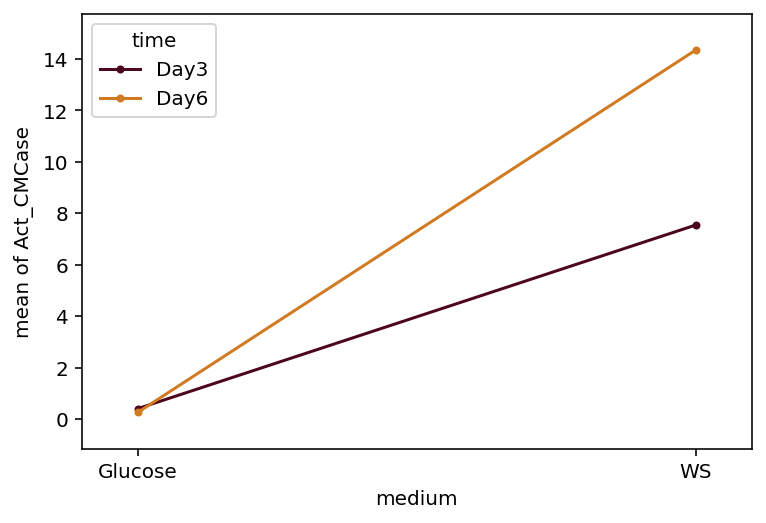

In [25]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=df['medium'], trace=df['time'], response=df['Act_CMCase'], 
    colors=['#4c061d','#d17a22'])
plt.show()